## <font color="Orange"> This EDA notebook is utilized for me to get familiar with the dataset/images. 
    Basically it serves a few purposes below: 
    - inspect the quality of the images
    - visualize the features/attributes of the images
    - demostrate my thought process to tackle the problem
    - perform trial data pre-processing and modelling steps before putting the final pipeline in ".py" file
    - record my findings thoughout the exploration

In [1]:
import cv2
import glob, os
import numpy as np
import pickle
import imagehash
from PIL import Image
import pytesseract
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from src.pre_processing_pipeline import start_preprocessing_image
from src.predicting_pipeline import Captcha

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
data_path = "./sampleCaptchas/input"
os.chdir(data_path)

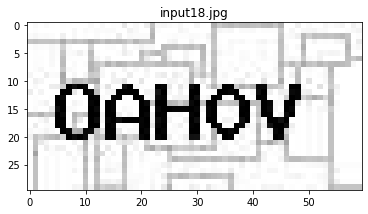

image size: (30, 60, 3)


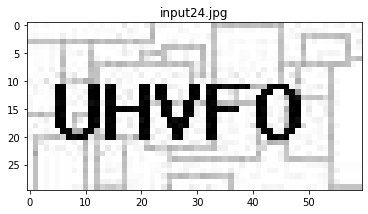

image size: (30, 60, 3)


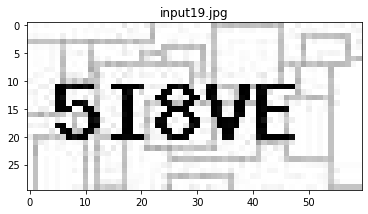

image size: (30, 60, 3)


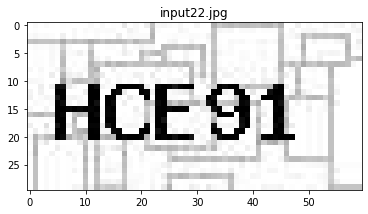

image size: (30, 60, 3)


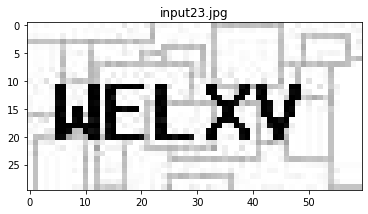

image size: (30, 60, 3)


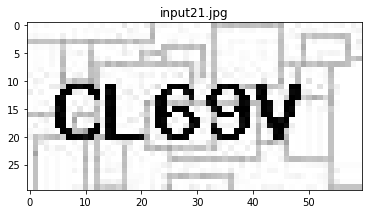

image size: (30, 60, 3)


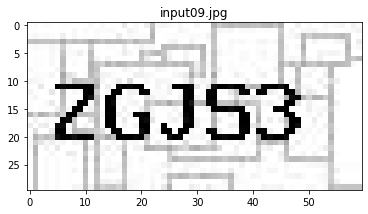

image size: (30, 60, 3)


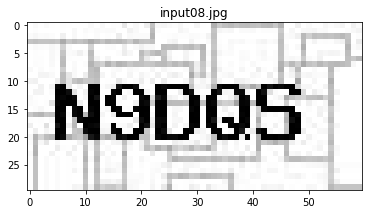

image size: (30, 60, 3)


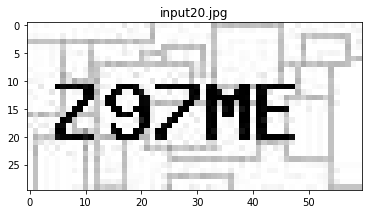

image size: (30, 60, 3)


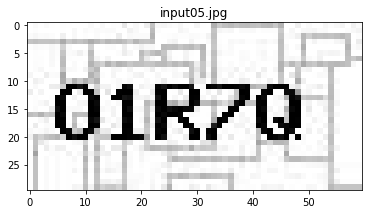

image size: (30, 60, 3)


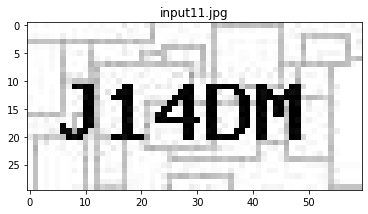

image size: (30, 60, 3)


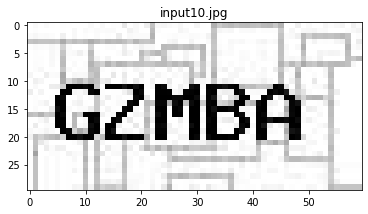

image size: (30, 60, 3)


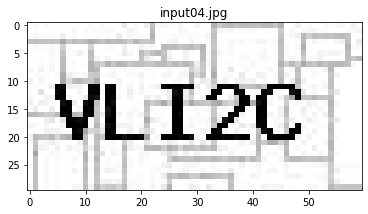

image size: (30, 60, 3)


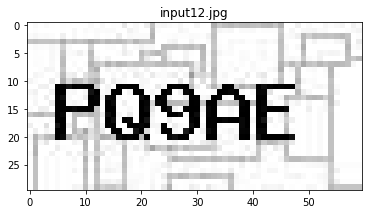

image size: (30, 60, 3)


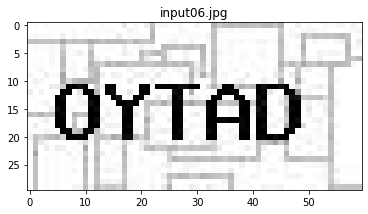

image size: (30, 60, 3)


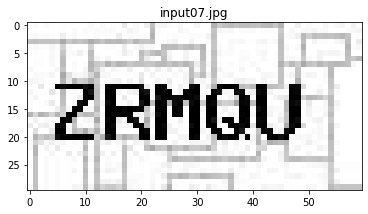

image size: (30, 60, 3)


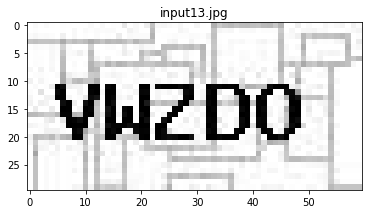

image size: (30, 60, 3)


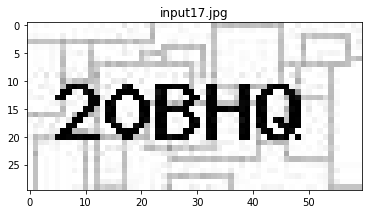

image size: (30, 60, 3)


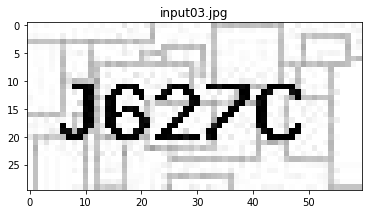

image size: (30, 60, 3)


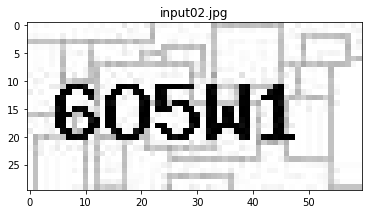

image size: (30, 60, 3)


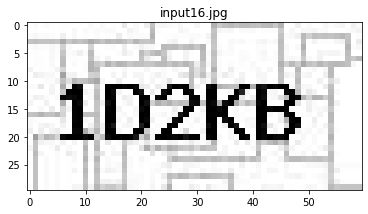

image size: (30, 60, 3)


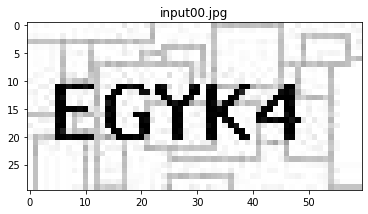

image size: (30, 60, 3)


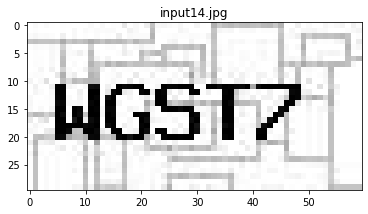

image size: (30, 60, 3)


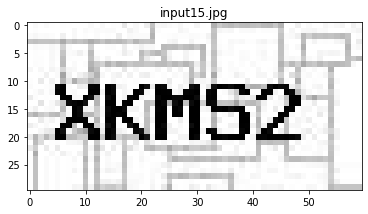

image size: (30, 60, 3)


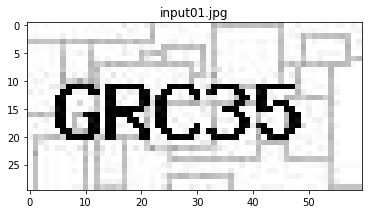

image size: (30, 60, 3)


In [3]:
# plot all training dataset
for file in glob.glob("*.jpg"):
    if file == "input100.jpg":
        continue
    img = mpimg.imread(file)
    imgplot = plt.imshow(img)
    plt.title(file)
    plt.show()
    print(f"image size: {img.shape}")

#### As mentioned in the problem statement, the images are quite clean, each character looks very well organised in terms of its size, font and spacing etc. However, noticed that there is background with light intensity that appears in each image. This noise background can be removed during pre-processing stage.

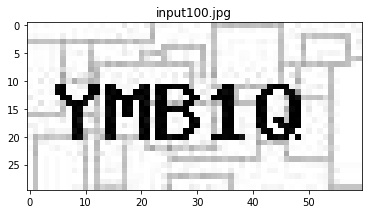

In [4]:
# plot test dataset
filename = "input100.jpg"
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.title(filename)
plt.show()

## <font color="Orange"> Using Google OCR

#### To identify the English characters and digits, the first method that came to my mind was using OCR technique, thus I will try with google ocr library here

<font color="green"> To install packages and run the OCR, you will have to follow the steps below:
    
    1. run pip install at your terminal:
        - pip install opencv-python
        - pip install pytesseract
    
    2. install binary for mac:
        - brew install tesseract
    
    3. add running path:
        - brew list tesseract
    then copy the path and paste it at the code below:
    e.g. pytesseract.pytesseract.tesseract_cmd = r'copied_path_here'


In [5]:
filename = "input19.jpg"

In [6]:
img = cv2.imread(filename)

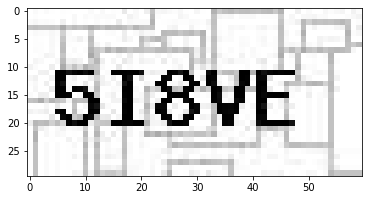

In [7]:
# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(gray, "gray", vmin=0, vmax=255)
plt.show()

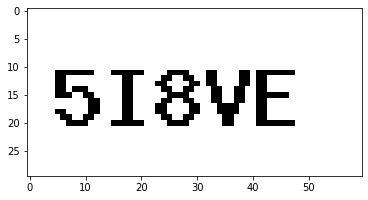

In [8]:
# convert the img to binary grayscale
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
imgplot = plt.imshow(thresh1, "gray", vmin=0, vmax=255)
plt.show()

In [9]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

In [10]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

In [11]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

In [12]:
im2 = img.copy()

In [13]:
contours

(array([[[ 0,  0]],
 
        [[ 0,  1]],
 
        [[ 0,  2]],
 
        [[ 0,  3]],
 
        [[ 0,  4]],
 
        [[ 0,  5]],
 
        [[ 0,  6]],
 
        [[ 0,  7]],
 
        [[ 0,  8]],
 
        [[ 0,  9]],
 
        [[ 0, 10]],
 
        [[ 0, 11]],
 
        [[ 0, 12]],
 
        [[ 0, 13]],
 
        [[ 0, 14]],
 
        [[ 0, 15]],
 
        [[ 0, 16]],
 
        [[ 0, 17]],
 
        [[ 0, 18]],
 
        [[ 0, 19]],
 
        [[ 0, 20]],
 
        [[ 0, 21]],
 
        [[ 0, 22]],
 
        [[ 0, 23]],
 
        [[ 0, 24]],
 
        [[ 0, 25]],
 
        [[ 0, 26]],
 
        [[ 0, 27]],
 
        [[ 0, 28]],
 
        [[ 0, 29]],
 
        [[ 1, 29]],
 
        [[ 2, 29]],
 
        [[ 3, 29]],
 
        [[ 4, 29]],
 
        [[ 5, 29]],
 
        [[ 6, 29]],
 
        [[ 7, 29]],
 
        [[ 8, 29]],
 
        [[ 9, 29]],
 
        [[10, 29]],
 
        [[11, 29]],
 
        [[12, 29]],
 
        [[13, 29]],
 
        [[14, 29]],
 
        [[15, 29]],
 
        [[

In [14]:
x, y, w, h = cv2.boundingRect(contours[0])

# Drawing a rectangle on copied image
rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Cropping the text block for giving input to OCR
cropped = im2[y:y + h, x:x + w]

pytesseract.pytesseract.tesseract_cmd = r'/usr/local/Cellar/tesseract/5.0.1/bin/tesseract'

# Apply OCR on the cropped image
text = pytesseract.image_to_string(cropped, lang="eng", config="--psm 6")

out_name = "output" + filename.split(".")[0][5:] + ".text"

with open(out_name, "w+") as f:
    f.write(text)

In [15]:
text

'SI8VE\n'

#### Well, the result was not bad, but also did notice that "5" had been identified wronly as "S", which can be understood as they are quite similar in shapes. Considering that no model training efforts is required for this transfer learning model, I felt this solution is acceptable.

## <font color="Orange"> Train My Own OCR model

#### Though we do not have large amount of images, I would like to explore some neural network techniques myself, and compare the result with the above.

In [16]:
# # clean all input images
# data_path = Path(".")

# for filename in list(data_path.glob("*.jpg")):
#     img = cv2.imread(str(filename))
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     ret, cleaned = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
#     out = "../cleaned_input/" + str(filename)
#     cv2.imwrite(out, cleaned)

In [17]:
# Get list of all the input images
data_path = Path("../cleaned_input")
temp = list(map(str, list(data_path.glob("*.jpg"))))
images = sorted([i for i in temp if i not in [str(data_path) + "/input21.jpg", str(data_path) + "/input100.jpg"]])
images = [img.split(os.path.sep)[-1].split(".jpg")[0] for img in images]
images

['input00',
 'input01',
 'input02',
 'input03',
 'input04',
 'input05',
 'input06',
 'input07',
 'input08',
 'input09',
 'input10',
 'input11',
 'input12',
 'input13',
 'input14',
 'input15',
 'input16',
 'input17',
 'input18',
 'input19',
 'input20',
 'input22',
 'input23',
 'input24']

In [18]:
# get the corresponding labels for the input images
label_path = Path("../output")
temp = sorted(list(map(str, list(label_path.glob("*.txt")))))
temp

['../output/output00.txt',
 '../output/output01.txt',
 '../output/output02.txt',
 '../output/output03.txt',
 '../output/output04.txt',
 '../output/output05.txt',
 '../output/output06.txt',
 '../output/output07.txt',
 '../output/output08.txt',
 '../output/output09.txt',
 '../output/output10.txt',
 '../output/output100.txt',
 '../output/output11.txt',
 '../output/output12.txt',
 '../output/output13.txt',
 '../output/output14.txt',
 '../output/output15.txt',
 '../output/output16.txt',
 '../output/output17.txt',
 '../output/output18.txt',
 '../output/output19.txt',
 '../output/output20.txt',
 '../output/output21.txt',
 '../output/output22.txt',
 '../output/output23.txt',
 '../output/output24.txt']

In [19]:
labels = list()
for path in temp:
    with open(path, "r") as f:
        content = f.read()
        labels.append(content[:5])
print(labels)

['EGYK4', 'GRC35', '6O5W1', 'J627C', 'VLI2C', 'O1R7Q', 'OYTAD', 'ZRMQU', 'N9DQS', 'ZGJS3', 'GZMBA', 'YMB1Q', 'J14DM', 'PQ9AE', 'VWZDO', 'WGST7', 'XKMS2', '1D2KB', '20BHQ', 'OAH0V', '5I8VE', 'Z97ME', 'CL69V', 'HCE91', 'WELXV', 'UHVFO']


In [20]:
# all the unique characters
characters = set(char for label in labels for char in label)

In [21]:
print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

Number of images found:  24
Number of labels found:  26
Number of unique characters:  36
Characters present:  {'1', '4', 'L', 'V', 'C', 'O', 'J', 'T', '7', 'B', '5', '6', '2', 'Y', 'W', 'H', '9', 'U', 'E', 'K', 'M', '8', 'G', 'Z', 'F', 'I', 'P', 'Q', 'A', 'D', 'N', 'X', 'S', 'R', '3', '0'}


In [22]:
# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width = 30
img_height = 60

# Factor by which the image is going to be downsampled
# by the convolutional blocks. We will be using two
# convolution blocks and each block will have
# a pooling layer which downsample the features by a factor of 2.
# Hence total downsampling factor would be 4.
downsample_factor = 4

# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])

In [23]:
list(zip(images, labels))

[('input00', 'EGYK4'),
 ('input01', 'GRC35'),
 ('input02', '6O5W1'),
 ('input03', 'J627C'),
 ('input04', 'VLI2C'),
 ('input05', 'O1R7Q'),
 ('input06', 'OYTAD'),
 ('input07', 'ZRMQU'),
 ('input08', 'N9DQS'),
 ('input09', 'ZGJS3'),
 ('input10', 'GZMBA'),
 ('input11', 'YMB1Q'),
 ('input12', 'J14DM'),
 ('input13', 'PQ9AE'),
 ('input14', 'VWZDO'),
 ('input15', 'WGST7'),
 ('input16', 'XKMS2'),
 ('input17', '1D2KB'),
 ('input18', '20BHQ'),
 ('input19', 'OAH0V'),
 ('input20', '5I8VE'),
 ('input22', 'Z97ME'),
 ('input23', 'CL69V'),
 ('input24', 'HCE91')]

#### Preprocessing

In [24]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [25]:
# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [26]:
def split_data(images, labels, train_size=0.8, shuffle=False):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid

In [27]:
# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = split_data(np.array(images), np.array(labels))

In [28]:
x_train

array(['input00', 'input01', 'input02', 'input03', 'input04', 'input05',
       'input06', 'input07', 'input08', 'input09', 'input10', 'input11',
       'input12', 'input13', 'input14', 'input15', 'input16', 'input17',
       'input18'], dtype='<U7')

In [29]:
y_train

array(['EGYK4', 'GRC35', '6O5W1', 'J627C', 'VLI2C', 'O1R7Q', 'OYTAD',
       'ZRMQU', 'N9DQS', 'ZGJS3', 'GZMBA', 'YMB1Q', 'J14DM', 'PQ9AE',
       'VWZDO', 'WGST7', 'XKMS2', '1D2KB', '20BHQ'], dtype='<U5')

In [30]:
def encode_single_sample(img, label):
    img_path = img + ".jpg"
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_jpeg(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}

#### Create Dataset objects

In [31]:
data_path = "../cleaned_input"
os.chdir(data_path)

In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

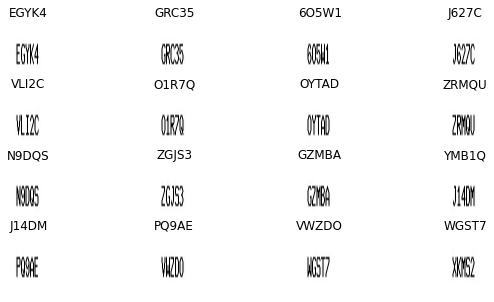

In [33]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

#### Modelling

In [34]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 30, 60, 1)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 30, 60, 32)   320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 15, 30, 32)   0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 15, 30, 64)   18496       ['pool1[0][0]']                  
                                                                                       

In [35]:
epochs = 100
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/100
2/2 [==============================] - 7s 2s/step - loss: 21.4088 - val_loss: 20.6850
Epoch 2/100
2/2 [==============================] - 0s 89ms/step - loss: 20.1287 - val_loss: 19.9871
Epoch 3/100
2/2 [==============================] - 0s 87ms/step - loss: 19.2589 - val_loss: 20.0746
Epoch 4/100
2/2 [==============================] - 0s 90ms/step - loss: 18.6346 - val_loss: 20.7711
Epoch 5/100
2/2 [==============================] - 0s 88ms/step - loss: 18.5173 - val_loss: 20.9819
Epoch 6/100
2/2 [==============================] - 0s 87ms/step - loss: 18.3085 - val_loss: 20.8638
Epoch 7/100
2/2 [==============================] - 0s 87ms/step - loss: 18.1439 - val_loss: 21.0766
Epoch 8/100
2/2 [==============================] - 0s 85ms/step - loss: 18.0870 - val_loss: 21.3119
Epoch 9/100
2/2 [==============================] - 0s 86ms/step - loss: 17.8269 - val_loss: 21.4866
Epoch 10/100
2/2 [==============================] - 0s 84ms/step - loss: 17.7006 - val_loss: 21.6303
E

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 30, 60, 1)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 30, 60, 32)        320       
                                                                 
 pool1 (MaxPooling2D)        (None, 15, 30, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 15, 30, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 7, 15, 64)         0         
                                                                 
 reshape (Reshape)           (None, 7, 960)            0         
                                                                 
 dense1 (Dense)              (None, 7, 64)             61504 

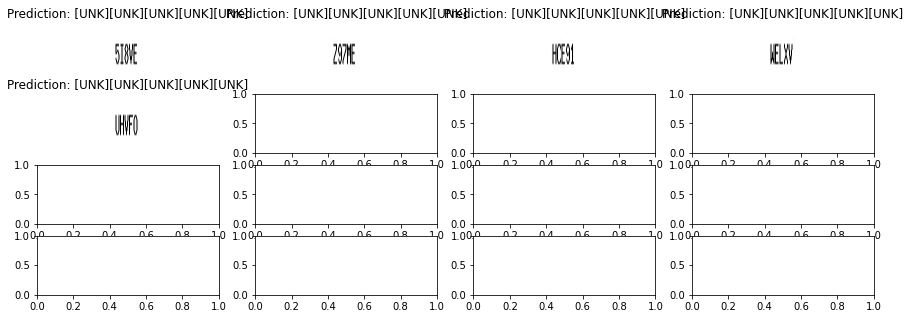

In [36]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

#### The result is terrible, I guess this is due to the lack of training data, because neural network need large variation of data to optimise the coefficients

## <font color="Orange"> Pixel Value Matching Method

#### This method is very use-case specific, it may not be perform well to identify all kinds of Captchas, but noticed that this dataset is so clean and well prepared, pixel matching may perform better than expected.

In [37]:
# data_path = "./sampleCaptchas/input"
# os.chdir(data_path)

In [38]:
# Get list of all the input images
data_path = Path("../cleaned_input")
temp = list(map(str, list(data_path.glob("*.jpg"))))
images = sorted([i for i in temp if i not in [str(data_path) + "/input100.jpg"]])
images

['../cleaned_input/input00.jpg',
 '../cleaned_input/input01.jpg',
 '../cleaned_input/input02.jpg',
 '../cleaned_input/input03.jpg',
 '../cleaned_input/input04.jpg',
 '../cleaned_input/input05.jpg',
 '../cleaned_input/input06.jpg',
 '../cleaned_input/input07.jpg',
 '../cleaned_input/input08.jpg',
 '../cleaned_input/input09.jpg',
 '../cleaned_input/input10.jpg',
 '../cleaned_input/input11.jpg',
 '../cleaned_input/input12.jpg',
 '../cleaned_input/input13.jpg',
 '../cleaned_input/input14.jpg',
 '../cleaned_input/input15.jpg',
 '../cleaned_input/input16.jpg',
 '../cleaned_input/input17.jpg',
 '../cleaned_input/input18.jpg',
 '../cleaned_input/input19.jpg',
 '../cleaned_input/input20.jpg',
 '../cleaned_input/input21.jpg',
 '../cleaned_input/input22.jpg',
 '../cleaned_input/input23.jpg',
 '../cleaned_input/input24.jpg']

In [39]:
label_path = Path("../output")
temp = list(map(str, list(label_path.glob("*.txt"))))
temp = sorted([i for i in temp if i not in [str(label_path) + "/output100.txt"]])
labels = list()
for path in temp:
    with open(path, "r") as f:
        content = f.read()
        labels.append(content[:5])
print(labels)

['EGYK4', 'GRC35', '6O5W1', 'J627C', 'VLI2C', 'O1R7Q', 'OYTAD', 'ZRMQU', 'N9DQS', 'ZGJS3', 'GZMBA', 'J14DM', 'PQ9AE', 'VWZDO', 'WGST7', 'XKMS2', '1D2KB', '20BHQ', 'OAH0V', '5I8VE', 'Z97ME', 'CL69V', 'HCE91', 'WELXV', 'UHVFO']


In [40]:
mapper = dict(zip(images, labels))
mapper

{'../cleaned_input/input00.jpg': 'EGYK4',
 '../cleaned_input/input01.jpg': 'GRC35',
 '../cleaned_input/input02.jpg': '6O5W1',
 '../cleaned_input/input03.jpg': 'J627C',
 '../cleaned_input/input04.jpg': 'VLI2C',
 '../cleaned_input/input05.jpg': 'O1R7Q',
 '../cleaned_input/input06.jpg': 'OYTAD',
 '../cleaned_input/input07.jpg': 'ZRMQU',
 '../cleaned_input/input08.jpg': 'N9DQS',
 '../cleaned_input/input09.jpg': 'ZGJS3',
 '../cleaned_input/input10.jpg': 'GZMBA',
 '../cleaned_input/input11.jpg': 'J14DM',
 '../cleaned_input/input12.jpg': 'PQ9AE',
 '../cleaned_input/input13.jpg': 'VWZDO',
 '../cleaned_input/input14.jpg': 'WGST7',
 '../cleaned_input/input15.jpg': 'XKMS2',
 '../cleaned_input/input16.jpg': '1D2KB',
 '../cleaned_input/input17.jpg': '20BHQ',
 '../cleaned_input/input18.jpg': 'OAH0V',
 '../cleaned_input/input19.jpg': '5I8VE',
 '../cleaned_input/input20.jpg': 'Z97ME',
 '../cleaned_input/input21.jpg': 'CL69V',
 '../cleaned_input/input22.jpg': 'HCE91',
 '../cleaned_input/input23.jpg': '

In [41]:
characters = set(char for label in labels for char in label)
model = {k: None for k in characters}
model

{'1': None,
 '4': None,
 'L': None,
 'V': None,
 'C': None,
 'O': None,
 'J': None,
 'T': None,
 '7': None,
 'B': None,
 '5': None,
 '6': None,
 '2': None,
 'Y': None,
 'W': None,
 'H': None,
 '9': None,
 'U': None,
 'E': None,
 'K': None,
 'M': None,
 '8': None,
 'G': None,
 'Z': None,
 'F': None,
 'I': None,
 'P': None,
 'Q': None,
 'A': None,
 'D': None,
 'N': None,
 'X': None,
 'S': None,
 'R': None,
 '3': None,
 '0': None}

'file: ../cleaned_input/input00.jpg'

'label: EGYK4'

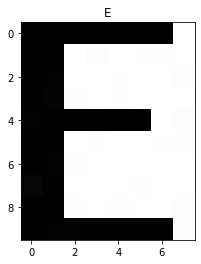

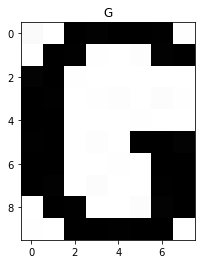

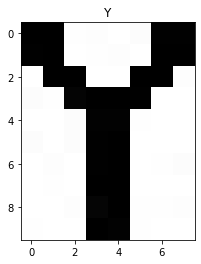

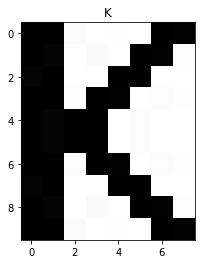

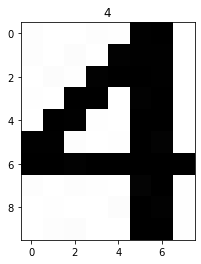

'file: ../cleaned_input/input01.jpg'

'label: GRC35'

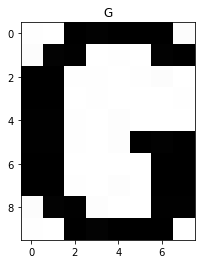

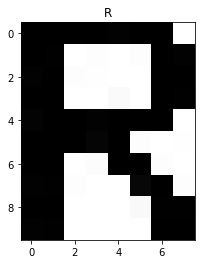

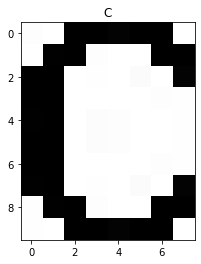

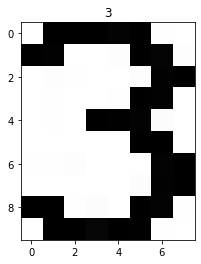

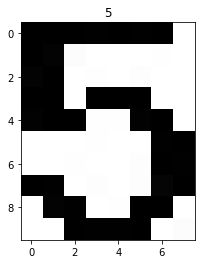

'file: ../cleaned_input/input02.jpg'

'label: 6O5W1'

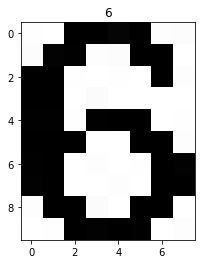

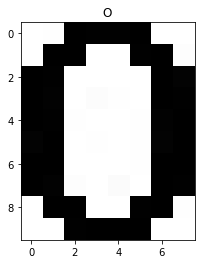

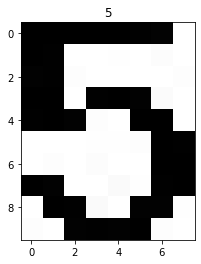

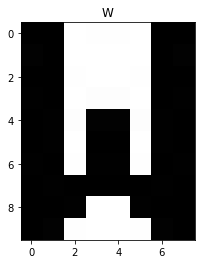

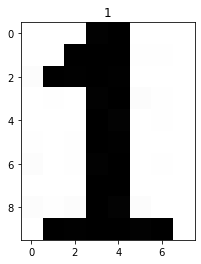

'file: ../cleaned_input/input03.jpg'

'label: J627C'

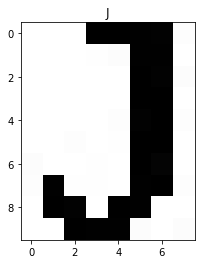

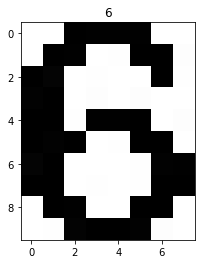

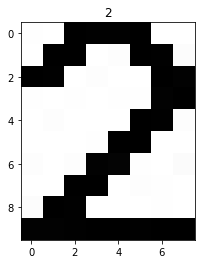

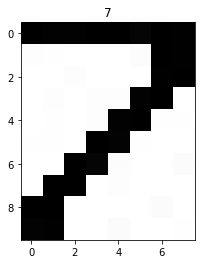

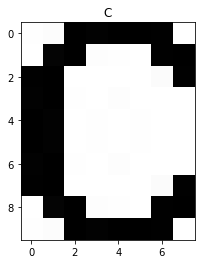

'file: ../cleaned_input/input04.jpg'

'label: VLI2C'

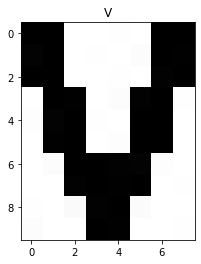

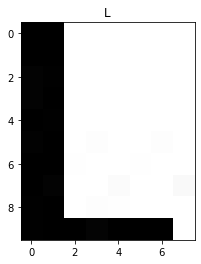

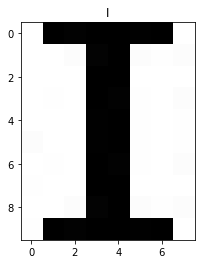

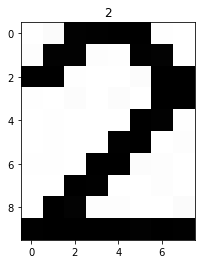

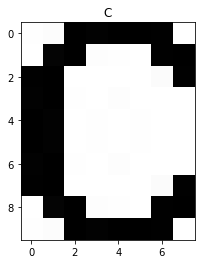

'file: ../cleaned_input/input05.jpg'

'label: O1R7Q'

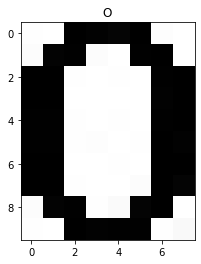

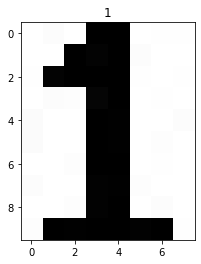

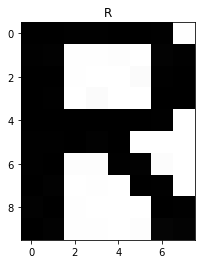

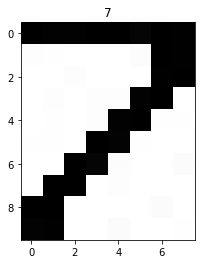

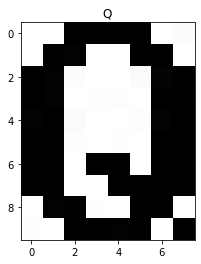

'file: ../cleaned_input/input06.jpg'

'label: OYTAD'

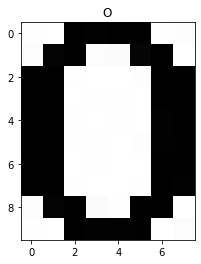

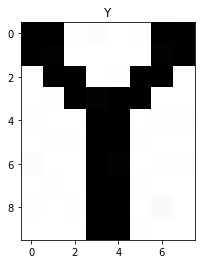

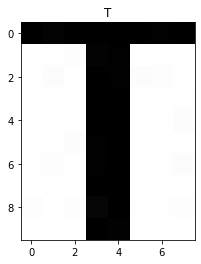

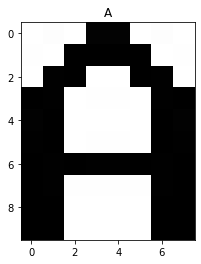

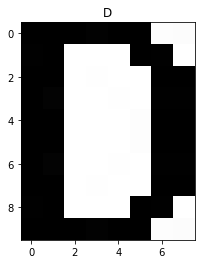

'file: ../cleaned_input/input07.jpg'

'label: ZRMQU'

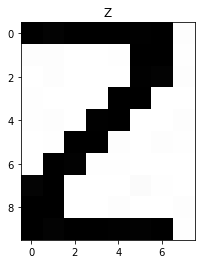

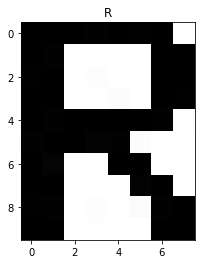

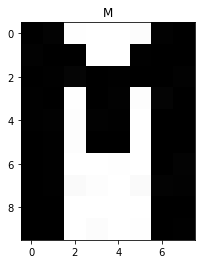

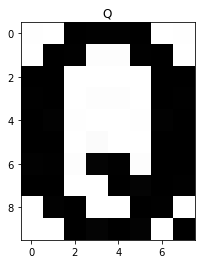

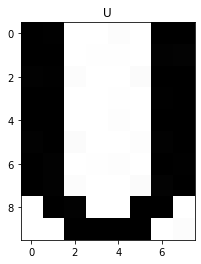

'file: ../cleaned_input/input08.jpg'

'label: N9DQS'

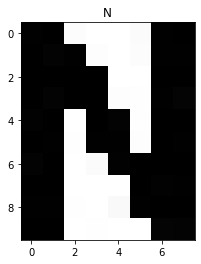

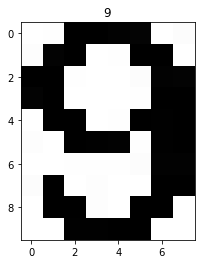

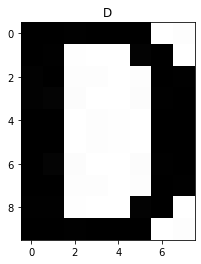

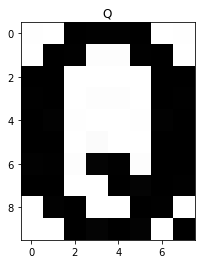

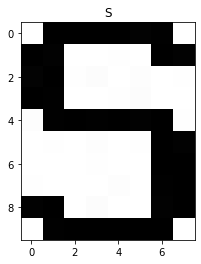

'file: ../cleaned_input/input09.jpg'

'label: ZGJS3'

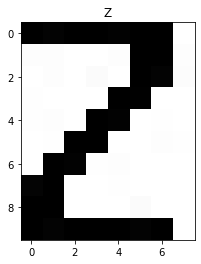

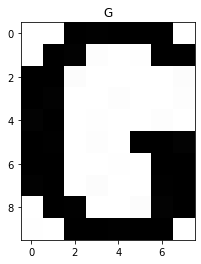

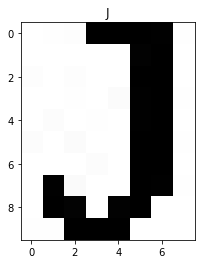

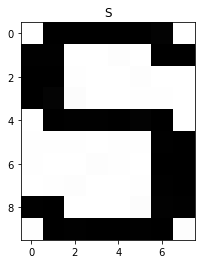

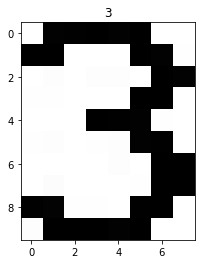

'file: ../cleaned_input/input10.jpg'

'label: GZMBA'

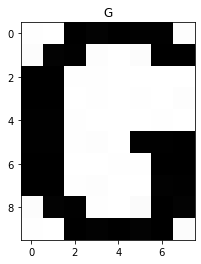

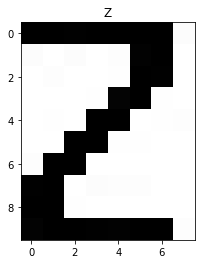

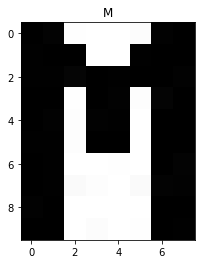

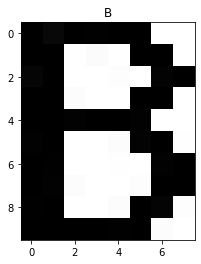

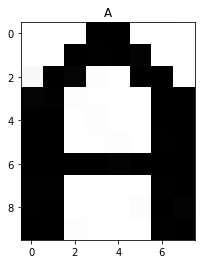

'file: ../cleaned_input/input11.jpg'

'label: J14DM'

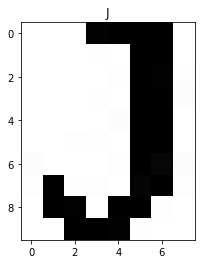

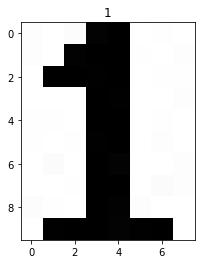

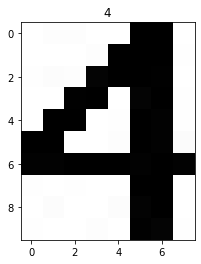

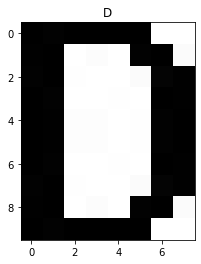

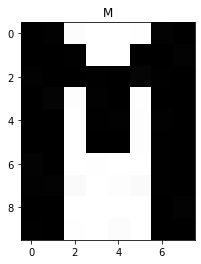

'file: ../cleaned_input/input12.jpg'

'label: PQ9AE'

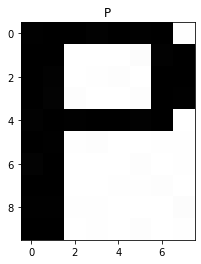

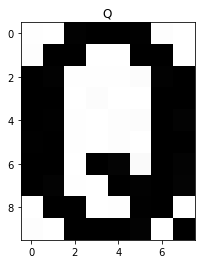

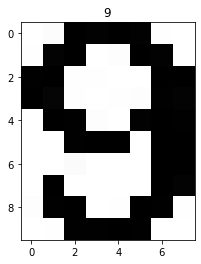

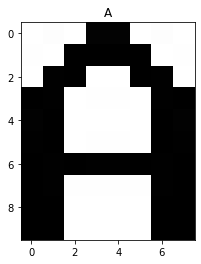

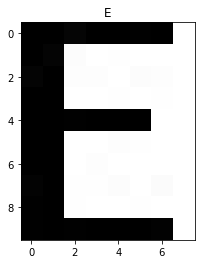

'file: ../cleaned_input/input13.jpg'

'label: VWZDO'

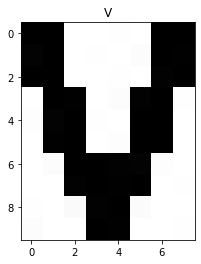

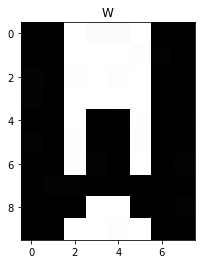

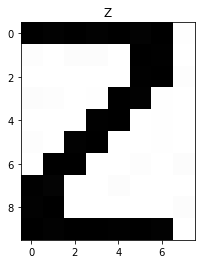

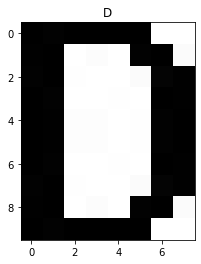

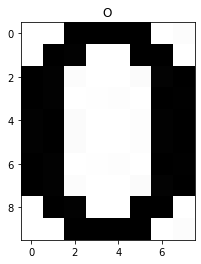

'file: ../cleaned_input/input14.jpg'

'label: WGST7'

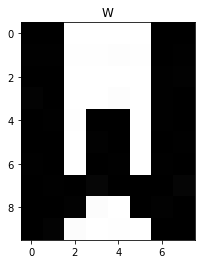

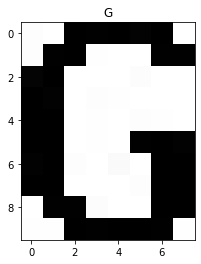

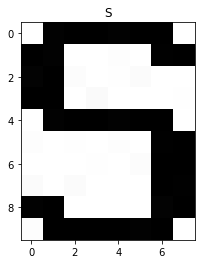

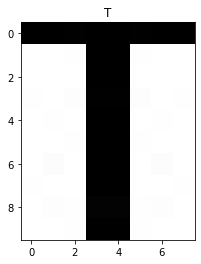

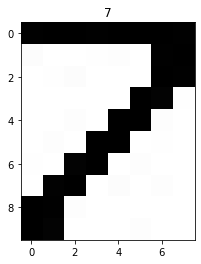

'file: ../cleaned_input/input15.jpg'

'label: XKMS2'

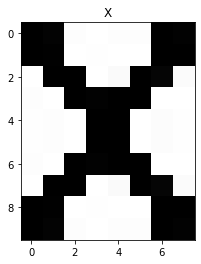

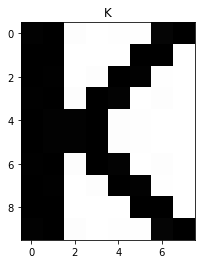

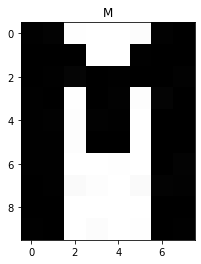

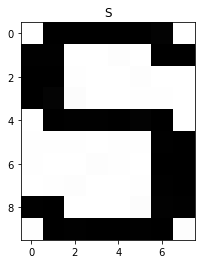

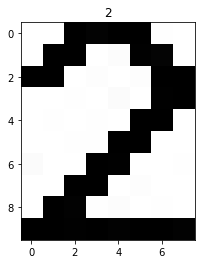

'file: ../cleaned_input/input16.jpg'

'label: 1D2KB'

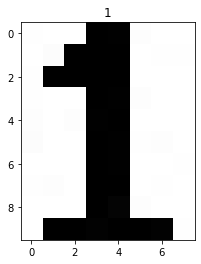

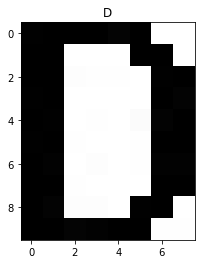

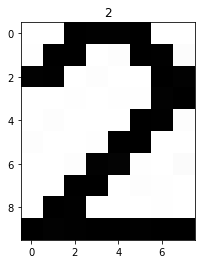

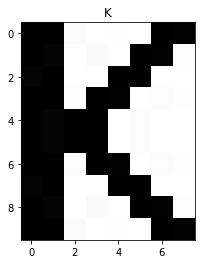

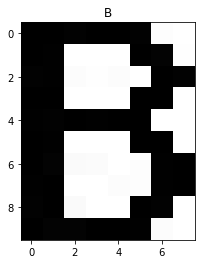

'file: ../cleaned_input/input17.jpg'

'label: 20BHQ'

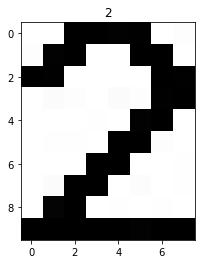

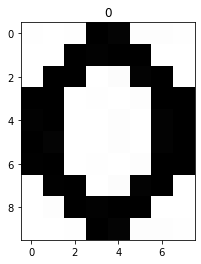

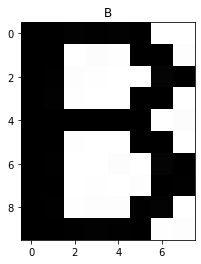

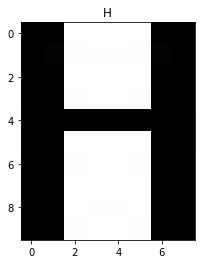

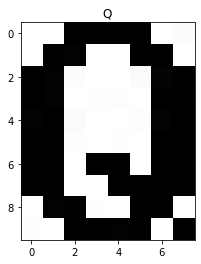

'file: ../cleaned_input/input18.jpg'

'label: OAH0V'

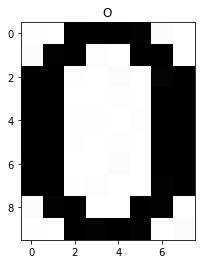

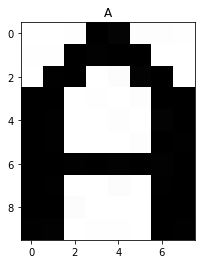

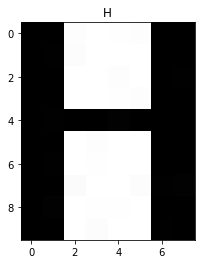

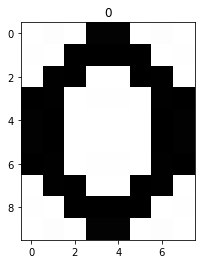

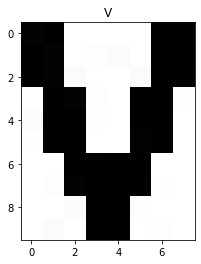

'file: ../cleaned_input/input19.jpg'

'label: 5I8VE'

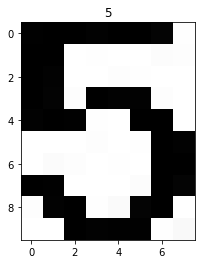

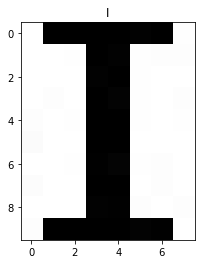

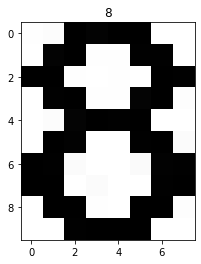

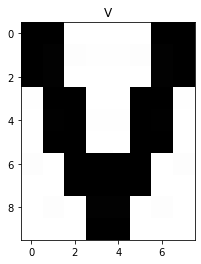

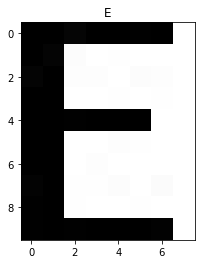

'file: ../cleaned_input/input20.jpg'

'label: Z97ME'

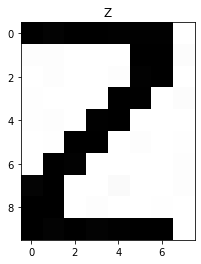

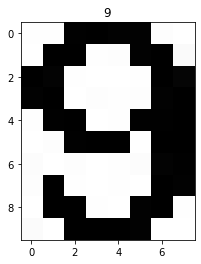

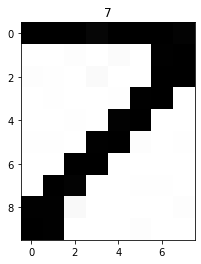

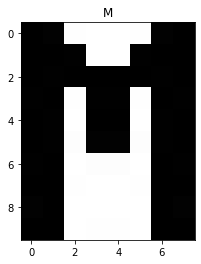

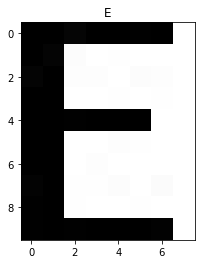

'file: ../cleaned_input/input21.jpg'

'label: CL69V'

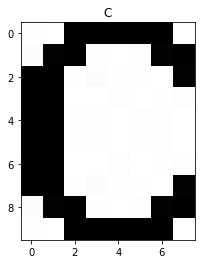

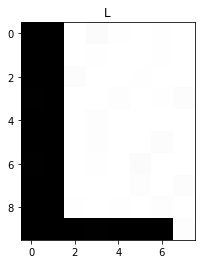

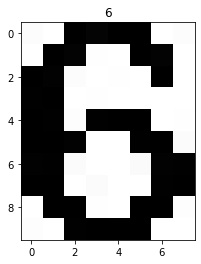

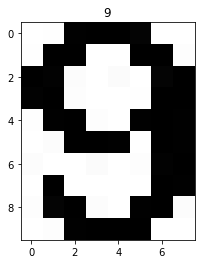

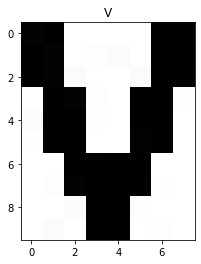

'file: ../cleaned_input/input22.jpg'

'label: HCE91'

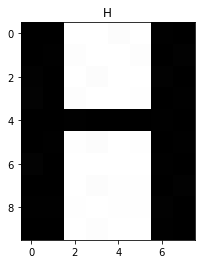

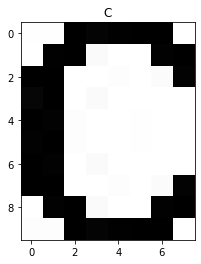

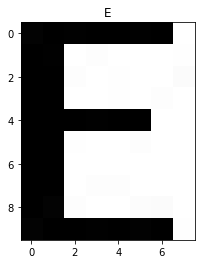

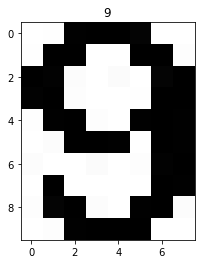

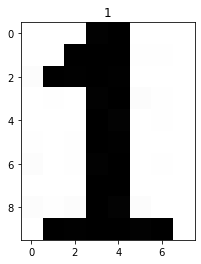

'file: ../cleaned_input/input23.jpg'

'label: WELXV'

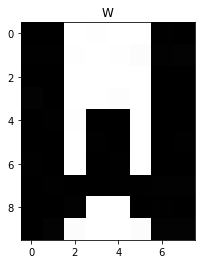

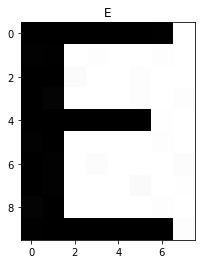

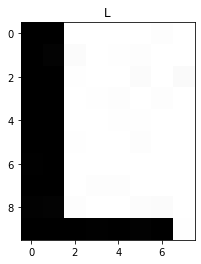

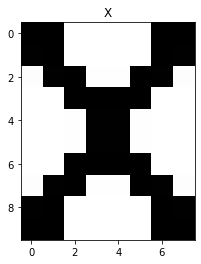

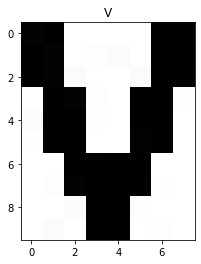

'file: ../cleaned_input/input24.jpg'

'label: UHVFO'

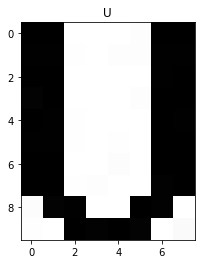

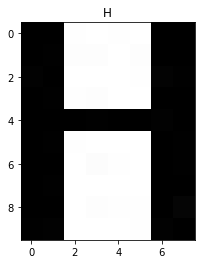

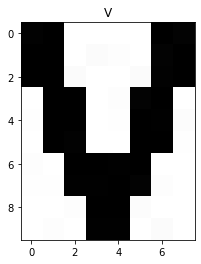

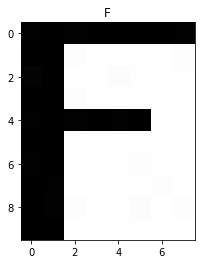

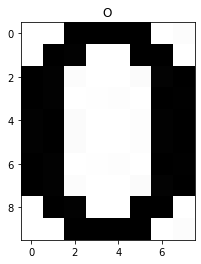

In [42]:
for filename in images:
    im = cv2.imread(filename)
    label = mapper[filename]
    display(f"file: {filename}")
    display(f"label: {label}")
#     cv2.rectangle(im, (5, 11), (12, 21), (255, 0, 255), 1)
#     cv2.rectangle(im, (14, 11), (22, 21), (255, 0, 255), 1)
#     cv2.rectangle(im, (23, 11), (31, 21), (255, 0, 255), 1)
#     cv2.rectangle(im, (32, 11), (40, 21), (255, 0, 255), 1)
#     cv2.rectangle(im, (41, 11), (49, 21), (255, 0, 255), 1)
    crop_img_1 = im[11:21, 5:13]
    plt.figure()
    plt.title(label[0])
    plt.imshow(crop_img_1)
    if model[label[0]] is None:
        model[label[0]] = crop_img_1
    
    crop_img_2 = im[11:21, 14:22]
    plt.figure()
    plt.title(label[1])
    plt.imshow(crop_img_2)
    if model[label[1]] is None:
        model[label[1]] = crop_img_2
    
    crop_img_3 = im[11:21, 23:31]
    plt.figure()
    plt.title(label[2])
    plt.imshow(crop_img_3)
    if model[label[2]] is None:
        model[label[2]] = crop_img_3

    crop_img_4 = im[11:21, 32:40]
    plt.figure()
    plt.title(label[3])
    plt.imshow(crop_img_4)
    if model[label[3]] is None:
        model[label[3]] = crop_img_4
    
    crop_img_5 = im[11:21, 41:49]
    plt.figure()
    plt.title(label[4])
    plt.imshow(crop_img_5)
    if model[label[4]] is None:
        model[label[4]] = crop_img_5
    
    plt.show()

#### <font color="red"> ***data cleaning: one wrong captchas character was rectified by visual checks: <br><br> - output03.text: "J827C" -> "J627C"



In [43]:
# get the hash for each character
model = {k: imagehash.average_hash(Image.fromarray(v)) for k, v in model.items()}
model

{'1': array([[ True,  True,  True, False, False,  True,  True,  True],
        [ True, False, False, False, False,  True,  True,  True],
        [ True, False, False, False, False,  True,  True,  True],
        [ True,  True,  True, False, False,  True,  True,  True],
        [ True,  True,  True, False, False,  True,  True,  True],
        [ True,  True,  True, False, False,  True,  True,  True],
        [ True,  True,  True, False, False,  True,  True,  True],
        [ True, False, False, False, False, False, False,  True]]),
 '4': array([[ True,  True,  True,  True,  True, False, False,  True],
        [ True,  True,  True,  True, False, False, False,  True],
        [ True,  True, False, False,  True, False, False,  True],
        [ True, False, False,  True,  True, False, False,  True],
        [False, False,  True,  True,  True, False, False,  True],
        [False, False, False, False, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False,  True]

In [44]:
# with open('../model/model.p', 'wb') as fp:
#     pickle.dump(model, fp, protocol=pickle.HIGHEST_PROTOCOL)

# # load in model
# with open('../model/model.p', 'rb') as fp:
#     model = pickle.load(fp)

#### test similarity scores

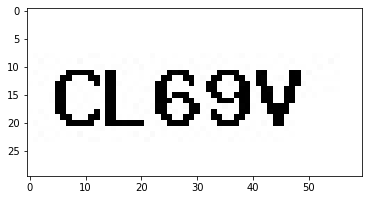

In [45]:
# view the original test image
path = "../cleaned_input"
image_name = "input21.jpg"
# image_name = "input03.jpg" # to observe the "6" difference
ori_image = cv2.imread(os.path.join(path, image_name))
plt.figure()
plt.imshow(ori_image, cmap="gray", vmin=0, vmax=255)

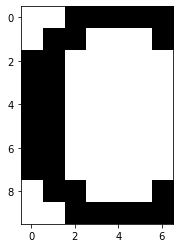

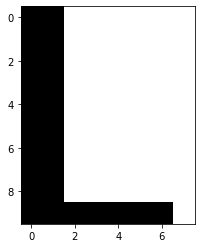

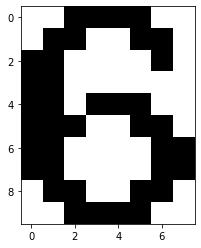

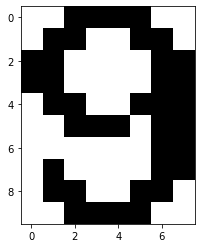

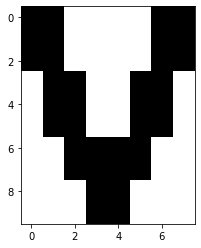

In [46]:
# break it into tokens
tokens = start_preprocessing_image(path, image_name, False)
# view tokens
for i in tokens:
    plt.figure()
    plt.imshow(i, cmap="gray", vmin=0, vmax=255)

In [47]:
# get hash values
tokens = start_preprocessing_image(path, image_name, True)
labels = list()
for i in tokens:
    minimum = 100
    label = None
    for k, v in model.items():
        if v - i < minimum:
            label = k
            minimum = v - i
    labels.append(label)
labels = "".join(labels)
labels

'CL69V'

In [48]:
# check similarity
labels[2]

'6'

In [49]:
# match totally with itself
tokens[2] - model["6"]

0

In [50]:
# dissimilarity score is 16
tokens[2] - model["9"]

16

#### This result so far is the best, also this method is simpler and easier to understand, so I will pick this method as the solution to this assignment.

## <font color="Orange"> Reference:


    - tesserect: 
    https://stackoverflow.com/a/51583635  
    https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/ 
    
    - RGB image:
    https://stackoverflow.com/a/52307690
    
    - Keras OCR: 
    https://keras.io/examples/vision/captcha_ocr/
    
    - image hash:
    https://github.com/JohannesBuchner/imagehash